In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data_seoul.csv")
df.head()

,date,confirmed,death,released,weather_temp,weather_rain,social_keyword_corona,social_keyword_disinfection,social_keyword_mask,social_keyword_infection,social_keyword_briefing,date_red,traffic_subway,confirmed_foreign,group_total,PM10
0,20200301,10,0,2,5.8,0.2,288841,19264,105352,17744,3281,1,1469158,0,0,45
1,20200302,4,0,0,3.4,0.0,341923,32023,202509,17089,3581,0,4162674,0,0,38
2,20200303,7,0,0,4.8,0.0,315235,30640,203550,19368,3270,0,4168576,0,0,45
3,20200304,1,0,0,2.2,0.0,300534,32469,174302,28207,4067,0,4163524,1,1,46
4,20200305,4,0,12,1.4,0.0,278765,26606,161861,26839,3288,0,4185111,0,0,36


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x = df[['death', 'released', 'weather_temp', 'weather_rain', 'social_keyword_corona', 'social_keyword_disinfection', 'social_keyword_mask', 'social_keyword_infection', 'social_keyword_briefing', 'date_red', 'traffic_subway', 'confirmed_foreign', 'group_total', 'PM10']]
y = df[['confirmed']]

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9, test_size=0.1)

In [5]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predicted = mlr.predict(x_test)

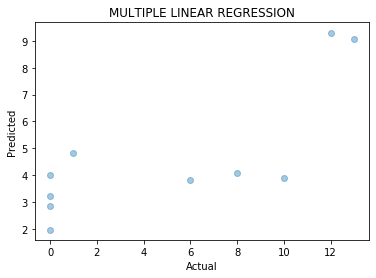

In [7]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predicted, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [8]:
print(mlr.coef_)

[[-2.54520028e+00 -2.13019042e-01 -4.10450791e-01 -2.39705393e-01
  -3.41795457e-05 -1.06743613e-04  1.00588342e-05  2.87011589e-04
  -6.44920080e-05  1.48324218e+00  7.51046198e-07  1.04216655e+00
   4.50796783e-01  1.18306651e-02]]


In [11]:
print(mlr.score(x_test, y_test))

0.417266077499764
0.4945773218850152
0.43355547886432527
